# TDP QC with TDAuditor

TDAuditor is a tool that helps researchers assess the quality of top-down proteomics experiments. It generates clear metrics and summaries that highlight patterns in the data, such as scan quality, distributions, and redundancies. By providing these insights, TDAuditor supports more reliable analysis.

In this analysis, we examine **E. coli samples** measured with multiple replicates. The datasets were deconvolved using three different tools: **FLASHDeconv**, **Xtract**, and **TopFD**, and subsequently audited with **TDAuditor**, producing separate .tsv output files for each tool.

We will start by importing the required Python packages and then load all .tsv files into a single dataframe for easier analysis and comparison.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob

from IPython.display import SVG
from util import create_boxplot

sns.set_style("whitegrid")

df = pd.concat([pd.read_csv(f, sep='\t') for f in glob.glob('*.tsv')])

Lets take a look at the contents of the dataframe:

In [2]:
df

,SourceFile,Instrument,SerialNumber,DeconvolutionEngine,StartTimeStamp,RTDuration,mzMLMS1Count,mzMLMSnCount,DeconvMSnWithPeaksCount,DeconvMSnWithoutPeaksCount,...,AALinkCountQ2,AALinkCountQ3,AALinkCountMax,TagLengthMin,TagLengthQ1,TagLengthQ2,TagLengthQ3,TagLengthMax,AALinkCountAbove2,TagLengthAbove2
0,20160201_F_MaD_EcoliK12_01,Orbitrap Fusion,CAL-MP16,TopFD,2016-02-01T12:10:37Z,96.656990,1152,1098,1057,41,...,4,20,274,0,0,1,4,15,557,376
1,20160201_F_MaD_EcoliK12_01bis,Orbitrap Fusion,CAL-MP16,TopFD,2016-02-01T14:13:26Z,95.868580,1041,1249,1207,42,...,14,57,294,0,1,3,6,20,817,619
2,20160201_F_MaD_EcoliK12_02,Orbitrap Fusion,CAL-MP16,TopFD,2016-02-01T16:16:15Z,100.035370,1186,1206,1181,25,...,25,82,262,0,1,4,6,18,853,713
3,20160201_F_MaD_EcoliK12_03,Orbitrap Fusion,CAL-MP16,TopFD,2016-02-01T22:25:03Z,99.981674,1191,1192,1134,58,...,19,72,242,0,1,3,6,16,742,633
4,20160201_F_MaD_EcoliK12_04,Orbitrap Fusion,CAL-MP16,TopFD,2016-02-02T00:27:54Z,100.005370,1097,1107,1087,20,...,14,43,130,0,1,2,4,20,806,489
5,20160201_F_MaD_EcoliK12_05,Orbitrap Fusion,CAL-MP16,TopFD,2016-02-02T06:36:24Z,100.051025,1185,1007,977,30,...,20,52,187,0,1,3,6,19,723,527
0,20160201_F_MaD_EcoliK12_01,Orbitrap Fusion,CAL-MP16,FLASHDeconv,2016-02-01T12:10:37Z,96.656990,1152,1098,874,0,...,2,9,93,0,0,1,3,16,430,325
1,20160201_F_MaD_EcoliK12_01bis,Orbitrap Fusion,CAL-MP16,FLASHDeconv,2016-02-01T14:13:26Z,95.868580,1041,1249,1061,0,...,5,17,112,0,0,2,5,18,631,526
2,20160201_F_MaD_EcoliK12_02,Orbitrap Fusion,CAL-MP16,FLASHDeconv,2016-02-01T16:16:15Z,100.035370,1186,1206,1043,0,...,12,35,157,0,1,3,6,29,756,634
3,20160201_F_MaD_EcoliK12_03,Orbitrap Fusion,CAL-MP16,FLASHDeconv,2016-02-01T22:25:03Z,99.981674,1191,1192,1006,0,...,14,41,171,0,1,4,6,19,710,611


## Understanding the Data

The first few columns provide key information about each top-down proteomics run:

- **SourceFile**: The name of the original mass spectrometry data file that was processed
- **Instrument**: The type of mass spectrometer used to acquire the data (e.g., Orbitrap, Q-TOF)
- **SerialNumber**: The unique serial number of the instrument
- **DeconvolutionEngine**: The software tool used for deconvolution (FLASHDeconv, Xtract, or TopFD in our case)
- **StartTimeStamp**: The date and time when the mass spectrometry run was initiated
- **RTDuration**: The total runtime duration of the chromatographic separation in minutes

This allow us to track and compare results across different instruments, time points, and deconvolution methods, making it easier to identify patterns and assess data quality systematically.

*The source file was named by a lab technician. Can you identify any discrepancies between the file labeling and the data it contains?*

## MS1 Spectra Count Analysis

Lets examine the **mzMLMS1Count** and **mzMLMS2Count** column, which represent the total number of MS1/2 spectra acquired in each dataset.

We will create a grouped bar chart to compare the counts across different source files and deconvolution engines:

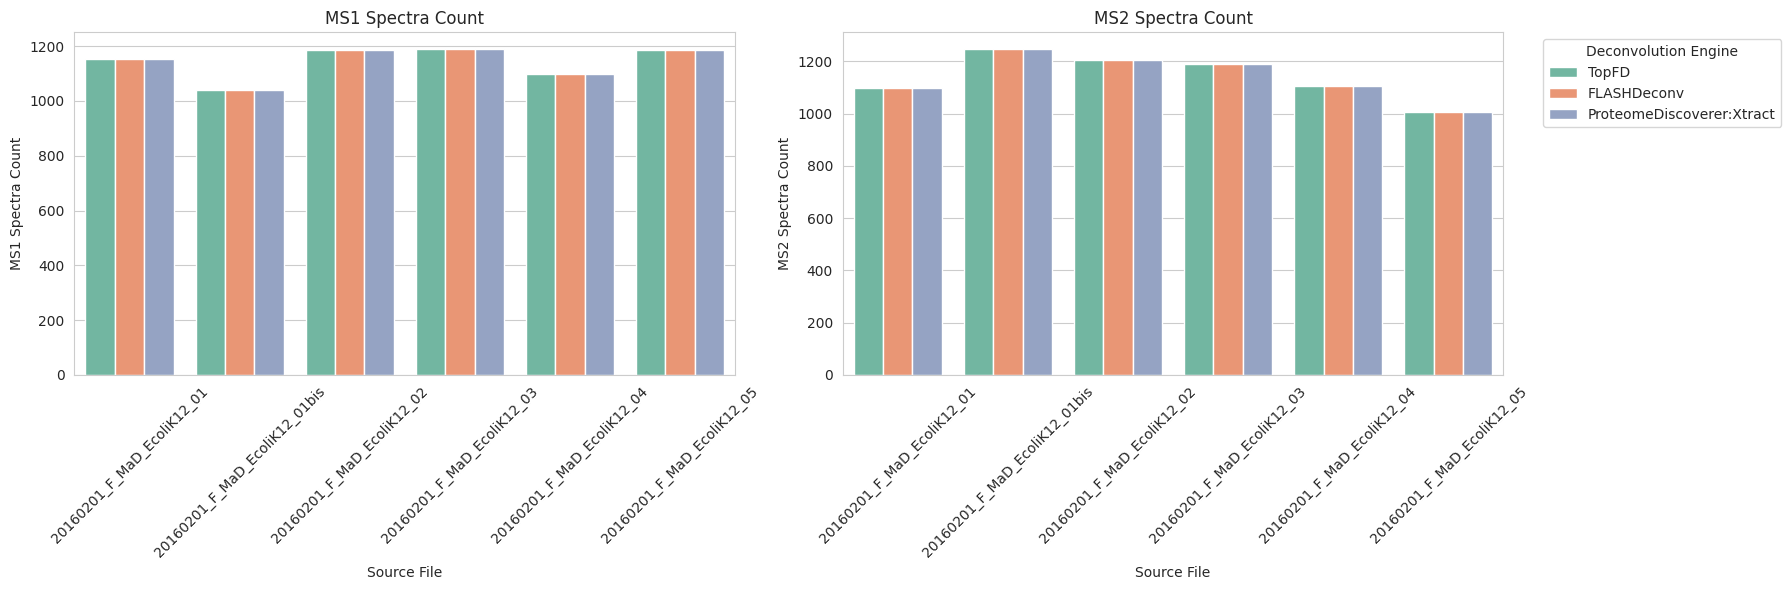

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

ycols = ['mzMLMS1Count', 'mzMLMSnCount']
titles = ['MS1 Spectra Count', 'MS2 Spectra Count']

for i, (ycol, title) in enumerate(zip(ycols, titles)):
    ax = axes[i]
    sns.barplot(
        data=df,
        x='SourceFile',
        y=ycol,
        hue='DeconvolutionEngine',
        palette='Set2',
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('Source File')
    ax.set_ylabel(title)
    ax.tick_params(axis='x', rotation=45)
    if i == 0:
        ax.legend_.remove()
    else:
        ax.legend(title='Deconvolution Engine', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Great! The number of acquired spectra matches across all deconvolution tools. If there had been discrepancies, it would have been indicated a mistake, since all tools were applied to the same input files. 

## MSn Spectra Analysis by Deconvolution Tool

Now lets examine the MSn spectra processing across the three deconvolution engines. We'll look at three key metrics:

- **mzMLMSnCount**: Total number of MSn spectra in the raw data
- **DeconvMSnWithPeaksCount**: Number of deconvolved MSn spectra that contain peaks
- **DeconvMSnWithoutPeaksCount**: Number of deconvolved MSn spectra without peaks

The side-by-side comparison will help us understand how each deconvolution tool performs in processing MSn spectra and identify any tool-specific patterns.

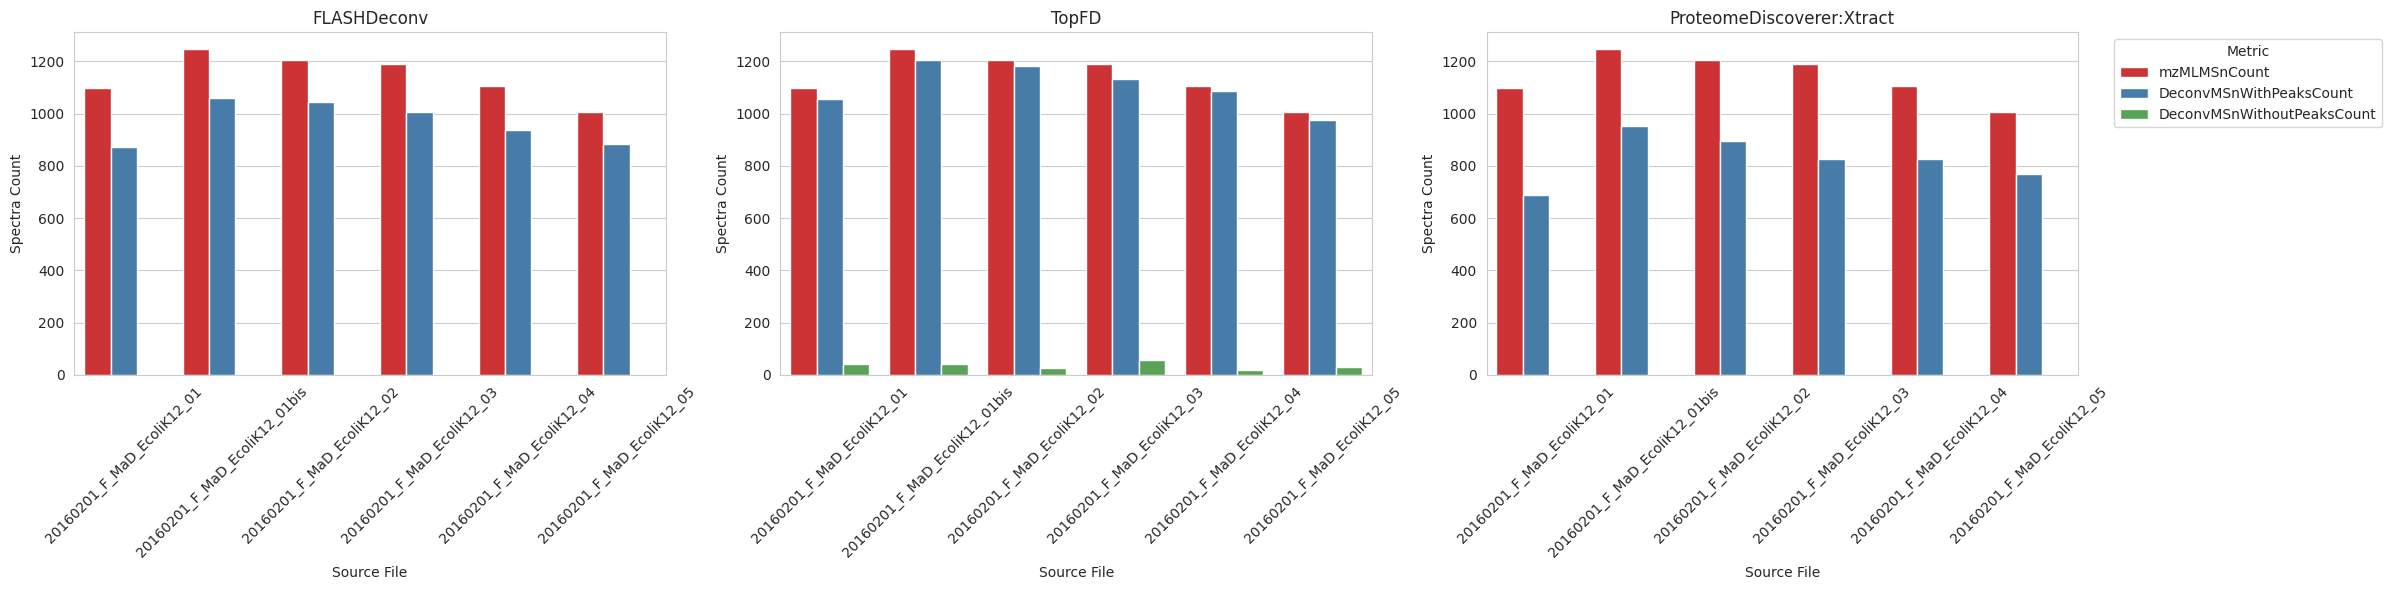

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

engines = ['FLASHDeconv', 'TopFD', 'ProteomeDiscoverer:Xtract']
ycols = ['mzMLMSnCount', 'DeconvMSnWithPeaksCount', 'DeconvMSnWithoutPeaksCount']

for i, engine in enumerate(engines):
    ax = axes[i]
    
    # Filter data for this engine
    engine_data = df[df['DeconvolutionEngine'] == engine]
    
    # Melt data to get the three columns as groups
    melted_data = engine_data.melt(
        id_vars=['SourceFile'], 
        value_vars=ycols,
        var_name='Metric',
        value_name='Count'
    )
    
    sns.barplot(
        data=melted_data,
        x='SourceFile',
        y='Count',
        hue='Metric',
        palette='Set1',
        ax=ax
    )
    ax.set_title(engine)
    ax.set_xlabel('Source File')
    ax.set_ylabel('Spectra Count')
    ax.tick_params(axis='x', rotation=45)
    if i < 2:
        ax.legend_.remove()
    else:
        ax.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


We can see that the different deconvolution engines process the data in distinct ways. **TopFD** reports the highest number of deconvolved spectra, and explicitly reports spectra even when no peaks are present.  In contrast, **FLASHDeconv** and **Xtract** report fewer spectra and do not explicitly report spectra without peaks. 

*Considering these plots, can you tell which deconvolution engine works best for this dataset? Why not?*

The above view is a bit inconvenient; using the fraction of deconvolved spectra we can summarize it a bit better. Lets examine the **DeconvMSnWithPeaksFraction** column to get a clearer picture of how many spectra were deconvoluted.


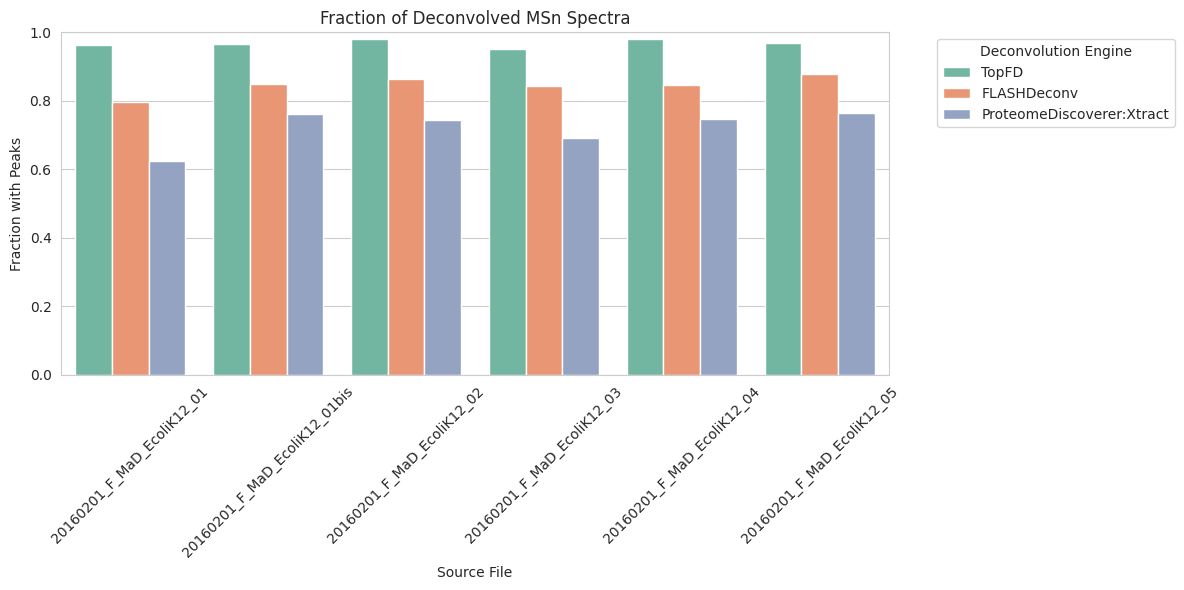

In [5]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df,
    x='SourceFile',
    y='DeconvMSnWithPeaksFraction',
    hue='DeconvolutionEngine',
    palette='Set2'
)

ax.set_title('Fraction of Deconvolved MSn Spectra')
ax.set_xlabel('Source File')
ax.set_ylabel('Fraction with Peaks')
ax.set_ylim(0, 1)
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Deconvolution Engine', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

We have looked at the counts of MSn spectra. Now lets take a look at the contents. One key metric is redundancy: of all possible MSn-MSn comparisons, what percentage found high similarity? Lets examine the **Redundancy** column to understand how many redundant MSn spectra each sample contains.

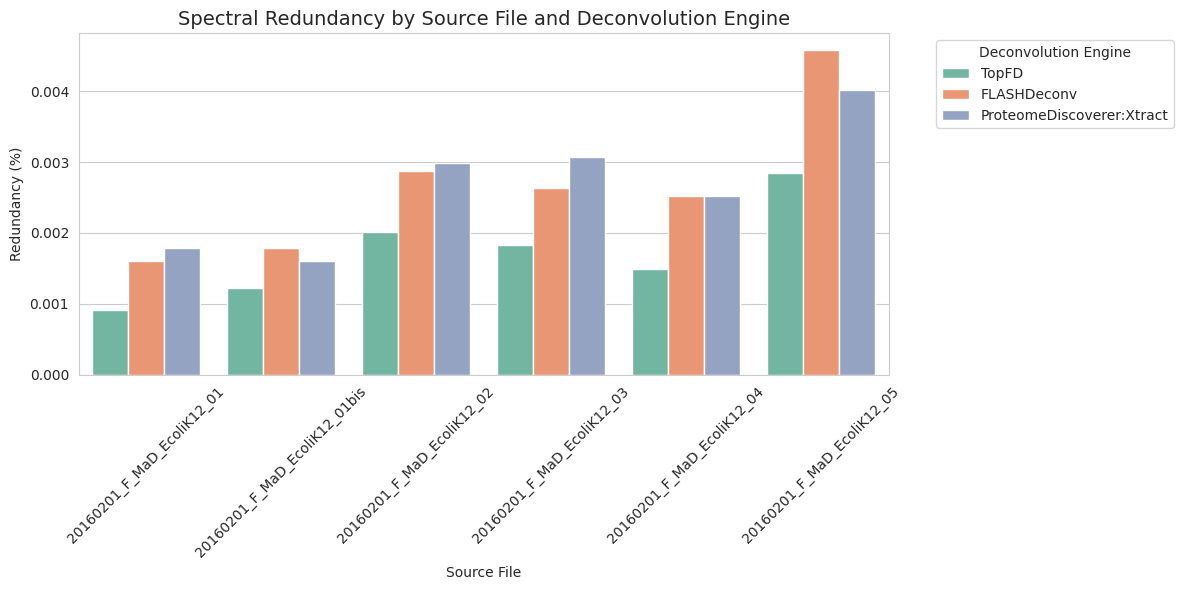

In [6]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df,
    x='SourceFile',
    y='Redundancy',
    hue='DeconvolutionEngine',
    palette='Set2'
)

ax.set_title('Spectral Redundancy by Source File and Deconvolution Engine', fontsize=14)
ax.set_xlabel('Source File')
ax.set_ylabel('Redundancy (%)')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Deconvolution Engine', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Interestingly, the redundancy varies across the different deconvolution engines. Another observation is that the ordering of redundancy does not follow the same trend as the total number of deconvolved spectra. *Why do you think this might be the case?* 

That said, the overall redundancy is very low, so we can conclude that the sample is essentially non-redundant.  


## Fragmentation Methods Analysis

Now let's examine the distribution of different fragmentation methods used in each dataset. These columns describe the number of fragment spectra with the specified fragmentation method in the mzML files: **mzMLHCDCount**, **mzMLCIDCount**, **mzMLETDCount**, **mzMLECDCount**, **mzMLEThcDCount**, **mzMLETciDCount**. Since we have established that the input data is consistent across all tools, we will only look at datapoints for FLASHDeconv.

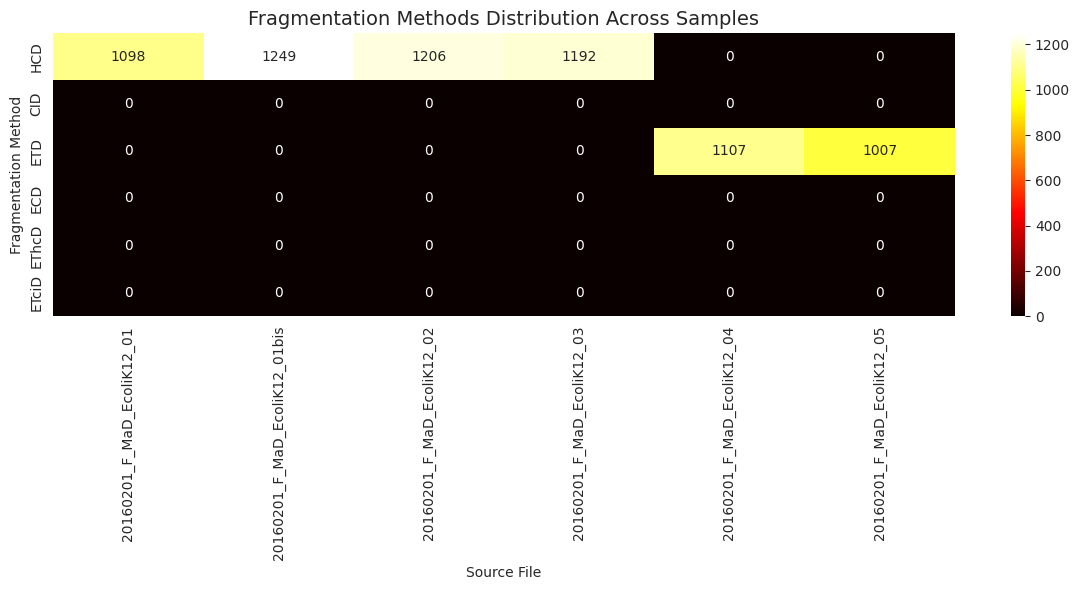

In [7]:
# Filter for FLASHDeconv data only
flash_data = df[df['DeconvolutionEngine'] == 'FLASHDeconv'].copy()

# Select fragmentation method columns
frag_cols = ['mzMLHCDCount', 'mzMLCIDCount', 'mzMLETDCount', 'mzMLECDCount', 'mzMLEThcDCount', 'mzMLETciDCount']

# Create subset with source files and fragmentation columns
heatmap_data = flash_data[['SourceFile'] + frag_cols].set_index('SourceFile')

# Rename columns to remove mzML prefix and Count suffix
heatmap_data.columns = [col.replace('mzML', '').replace('Count', '') for col in heatmap_data.columns]

# Transpose to have fragmentation methods on y-axis and samples on x-axis
heatmap_data = heatmap_data.T

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='hot')
plt.title('Fragmentation Methods Distribution Across Samples', fontsize=14)
plt.xlabel('Source File')
plt.ylabel('Fragmentation Method')
plt.tight_layout()
plt.show()


From the sample labeling, we initially assumed that the samples were simple replicates. *Looking at the heatmap above, does this assumption still hold true?*

## Precursor Charge Distribution Analysis

Now let's take a closer look at the data by examining the charge distributions. The columns **mzMLPreZMin**, **mzMLPreZQ1**, **mzMLPreZQ2**, **mzMLPreZQ3**, **mzMLPreZMax** provide the precursor charge distribution as annotated in the mzML files, ready to be plotted as boxplots.

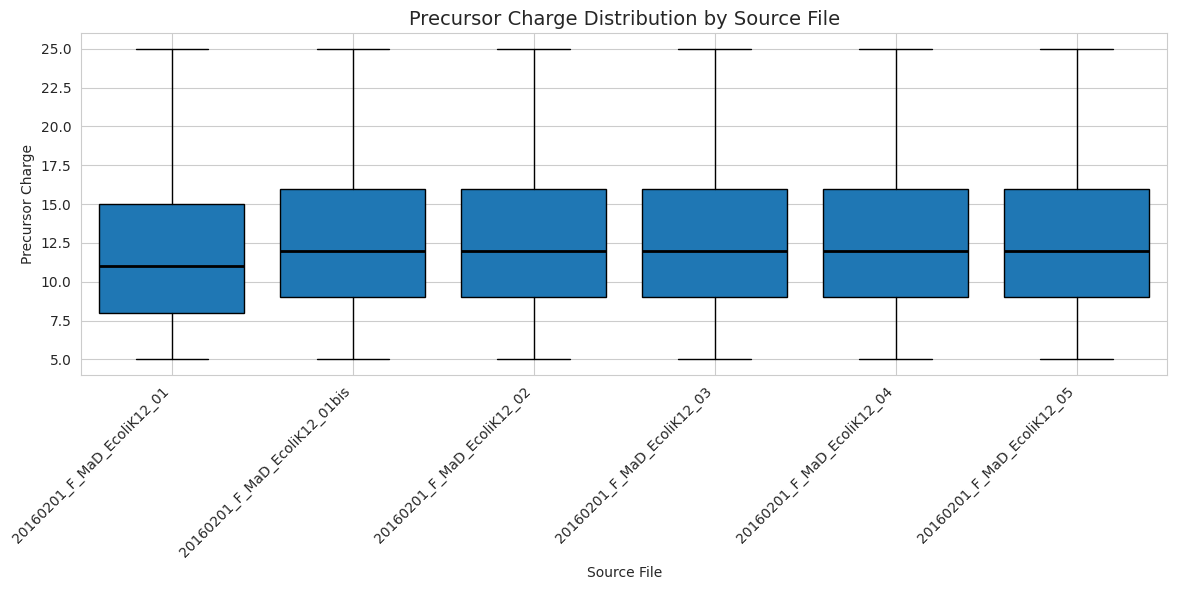

In [8]:
charge_cols = ['mzMLPreZMin', 'mzMLPreZQ1', 'mzMLPreZQ2', 'mzMLPreZQ3', 'mzMLPreZMax']
create_boxplot(
    data=df,
    quartile_cols=charge_cols,
    title='Precursor Charge Distribution by Source File',
    ylabel='Precursor Charge',
    grouped=False,
    filter_engine='FLASHDeconv'
)

Now let's examine the deconvolved precursor charge distributions. We can use the columns **DeconvPreZMin**, **DeconvPreZQ1**, **DeconvPreZQ2**, **DeconvPreZQ3**, **DeconvPreZMax** to compare how different deconvolution tools handle charge state assignments.

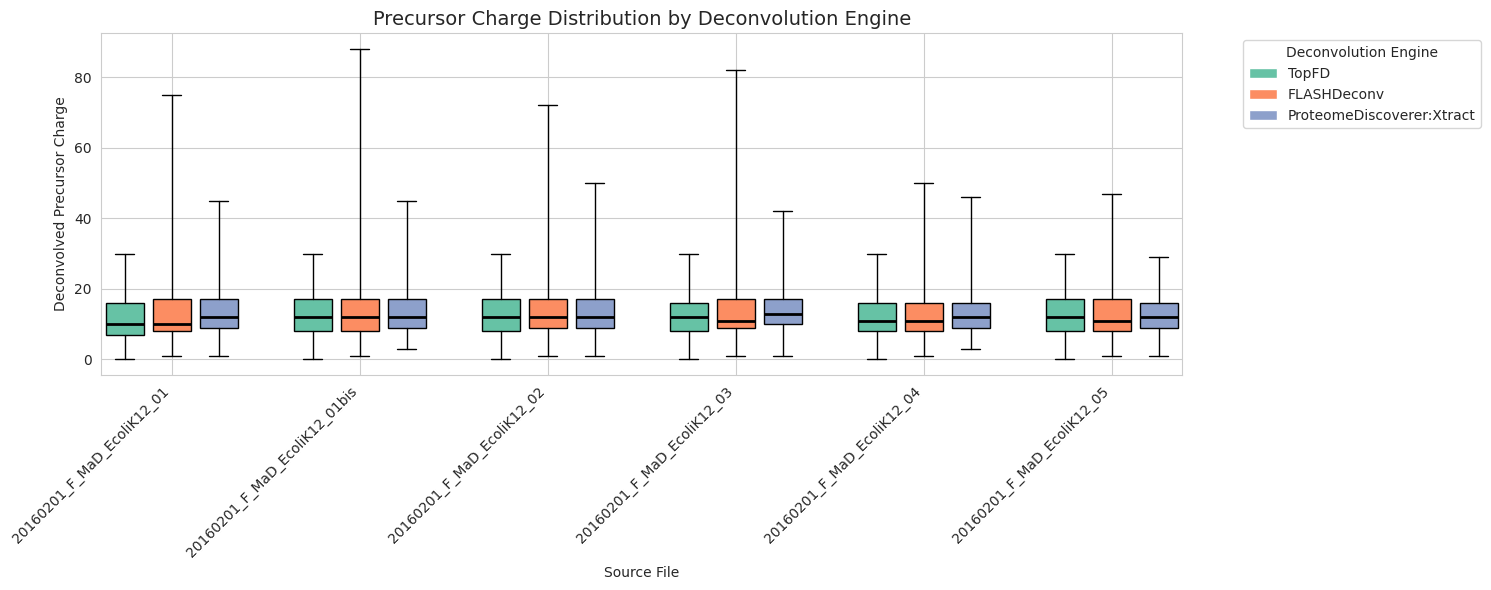

In [9]:
deconv_charge_cols = ['DeconvPreZMin', 'DeconvPreZQ1', 'DeconvPreZQ2', 'DeconvPreZQ3', 'DeconvPreZMax']
create_boxplot(
    data=df,
    quartile_cols=deconv_charge_cols,
    title='Precursor Charge Distribution by Deconvolution Engine',
    ylabel='Deconvolved Precursor Charge',
    grouped=True,
    figsize=(15, 6)
)

The majority of precursor charges assigned by the deconvolution engines are consistent across methods, which is encouraging. Among the tools compared, FLASHDeconv reports the broadest range of precursor charges, followed by Xtract and TopFD. This variation reflects both the parameter settings used during deconvolution and the underlying methodological differences between the engines.

## Precursor Mass Distribution Analysis

Now let's examine the precursor mass distributions from the deconvolved data. The columns **DeconvPreMassMin**, **DeconvPreMassQ1**, **DeconvPreMassQ2**, **DeconvPreMassQ3**, **DeconvPreMassMax** provide the mass distribution statistics for each dataset and deconvolution tool.


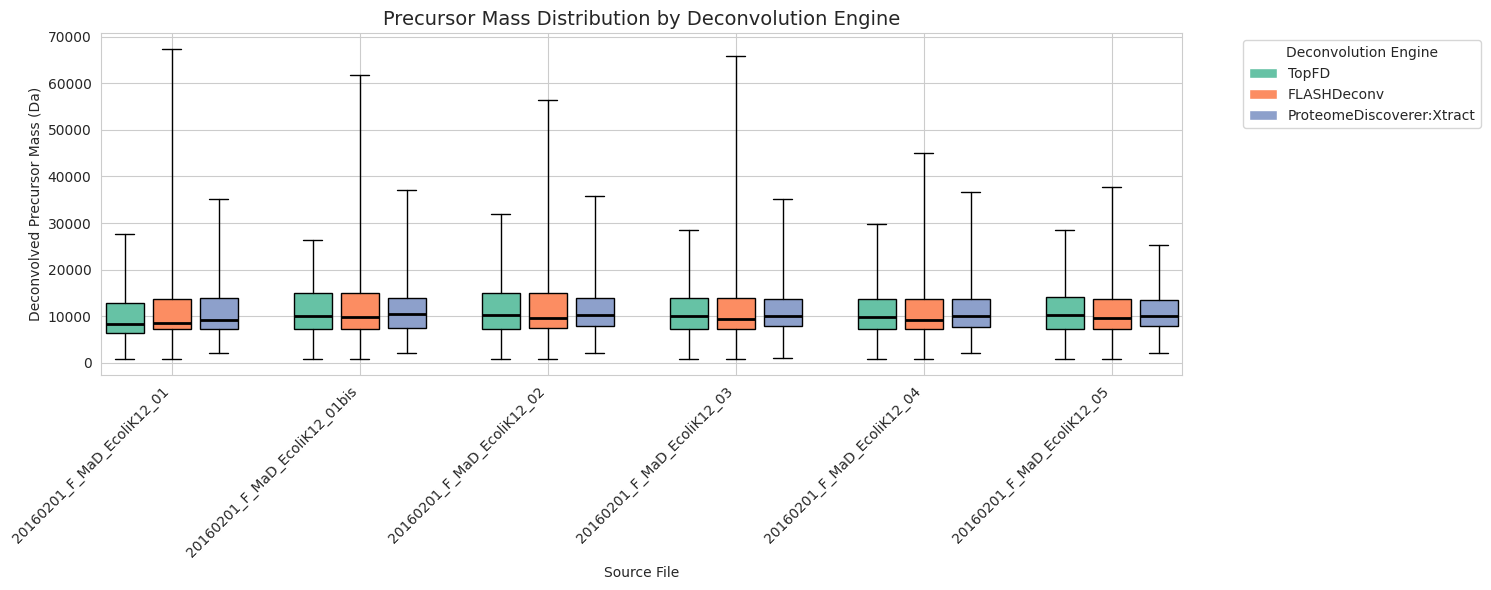

In [10]:
# Precursor Mass Distribution Analysis (All engines)
deconv_mass_cols = ['DeconvPreMassMin', 'DeconvPreMassQ1', 'DeconvPreMassQ2', 'DeconvPreMassQ3', 'DeconvPreMassMax']
create_boxplot(
    data=df,
    quartile_cols=deconv_mass_cols,
    title='Precursor Mass Distribution by Deconvolution Engine',
    ylabel='Deconvolved Precursor Mass (Da)',
    grouped=True,
    figsize=(15, 6)
)


Again, we observe that the majority of deconvolved precursor masses fall within a comparable range across the different engines. Among them, FLASHDeconv reports the broadest range, followed by Xtract and TopFD.

## Peak Count Analysis

Let's compare the peak counts before and after deconvolution. The **mzMLPeakCount** columns refer to the amount of peaks before deconvolution, while the **DeconvPeakCount** columns refer to the number of deconvolved masses after processing.

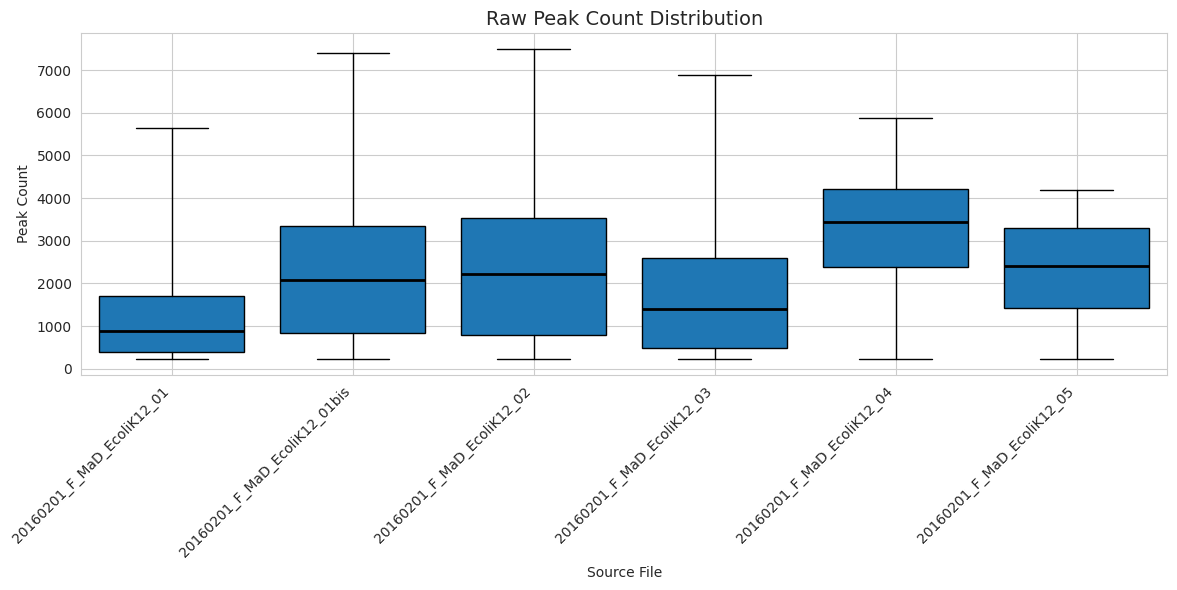

In [11]:
# Raw Peak Count Analysis
mzml_peak_cols = ['mzMLPeakCountMin', 'mzMLPeakCountQ1', 'mzMLPeakCountQ2', 'mzMLPeakCountQ3', 'mzMLPeakCountMax']
create_boxplot(
    data=df,
    quartile_cols=mzml_peak_cols,
    title='Raw Peak Count Distribution',
    ylabel='Peak Count',
    grouped=False,
    filter_engine='FLASHDeconv'
)


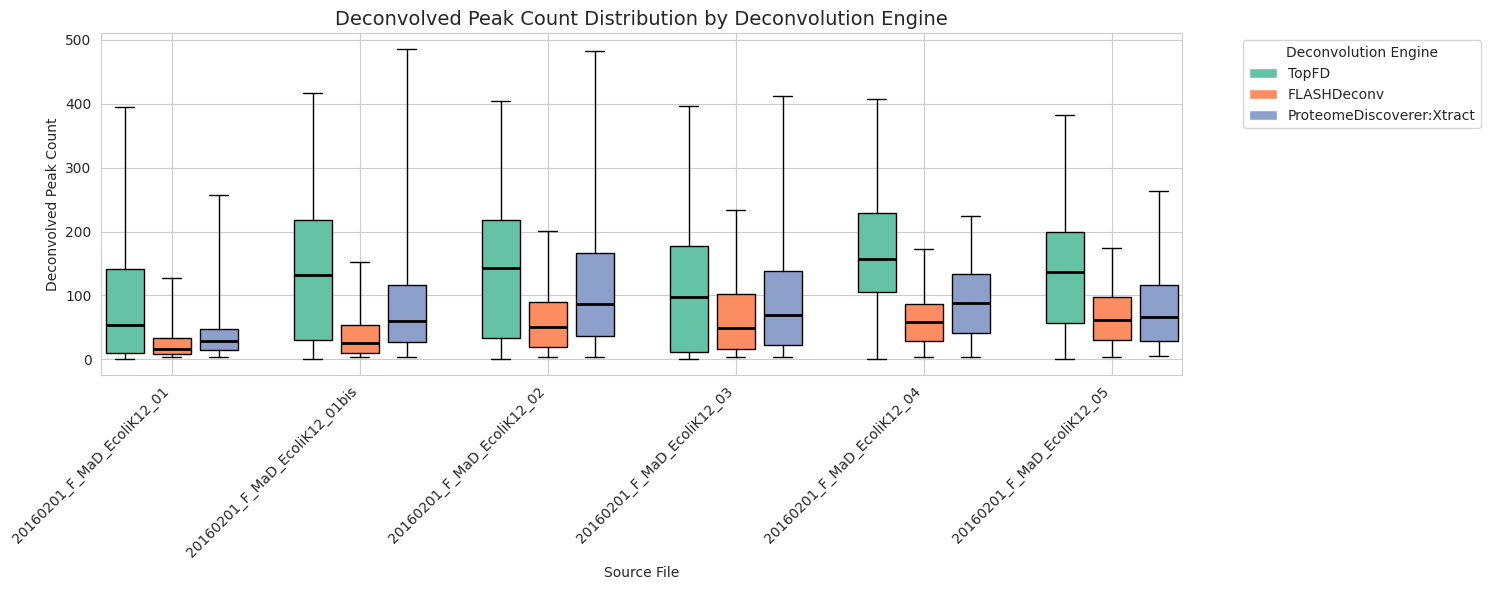

In [12]:
# Deconvolved Peak Count Analysis
deconv_peak_cols = ['DeconvPeakCountMin', 'DeconvPeakCountQ1', 'DeconvPeakCountQ2', 'DeconvPeakCountQ3', 'DeconvPeakCountMax']
create_boxplot(
    data=df,
    quartile_cols=deconv_peak_cols,
    title='Deconvolved Peak Count Distribution by Deconvolution Engine',
    ylabel='Deconvolved Peak Count',
    grouped=True,
    figsize=(15, 6)
)


After deconvolution, the number of peaks is greatly reduced. This is expected, but raises an important question: *why does this reduction occur?*

Across the different engines, TopFD produces the largest number of peaks, followed by Xtract, while FLASHDeconv reports the fewest. This naturally leads to the question: *does a higher number of peaks necessarily imply higher-quality deconvolution? Why not?*

## Sequence Tags  

A **sequence tag** is a short stretch of information derived from an MS/MS spectrum that corresponds to part of a protein sequence. It is built from a series of fragment ions whose masses differ by exactly the mass of one amino acid residue.  

For example, if we detect three consecutive fragment peaks where the mass differences match those of specific amino acids, we can infer a short sequence (a "tag") directly from the spectrum. These tags serve as reliable “anchors” because they do not rely on full database searches, but instead arise from consistent mass differences observed in the experimental data.  

Sequence tags are powerful because:  
- They provide **direct sequence evidence** even in noisy spectra.  
- They can help validate peptide or proteoform identifications.  

In short, sequence tags act as **building blocks of confidence** within top-down proteomics, helping us connect spectral data to actual biological sequences.  

**FLASHTnT** leverages sequence tags among other methods to identify proteoforms. An example (visualized with **FLASHApp**) is shown below, where consecutive fragment peaks form a tag that directly reveals a short sequence within the proteoform. This approach increases robustness, especially when spectra are noisy or incomplete.  

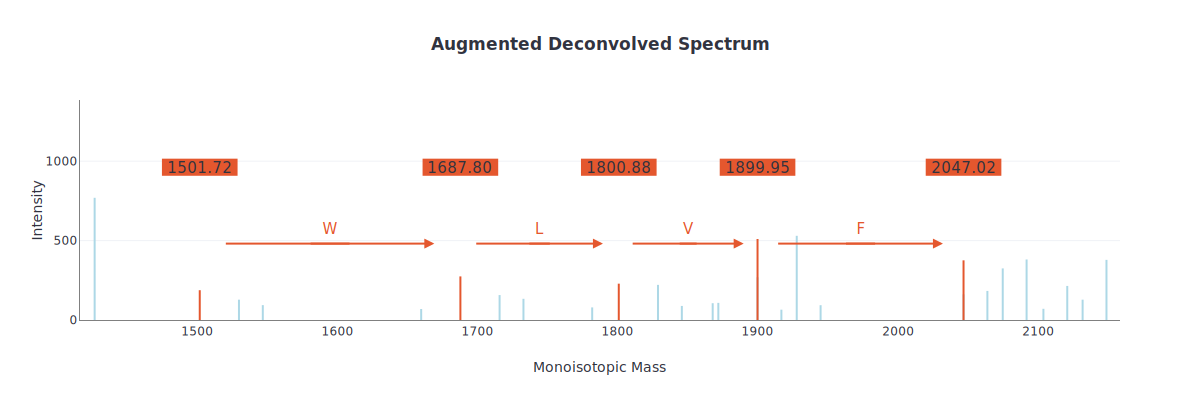

In [13]:
SVG(filename='sequence_tag.svg')

In this context, we will refer to the connection between **two consecutive amino acids** as an **amino acid link**. A **sequence tag** is then defined as a chain of such links observed in sequence.  

For example, the plot above shows a single sequence tag made up of **four amino acid links**.  This means that five consecutive masses were connected by their mass differences, forming one continuous tag.  

## Amino Acid Link Count Analysis

Lets now look at the number of plausible amino acid links contained in the mass spectra outputted by each deconvolution engine. The **AALinkCount** columns provide statistics on how many amino acid connections could be identified for the deconvolved MS2 spectra. In **TDAuditor** amino acid links are identified even if the mass difference does not correspond to an amino acid. Plausiblity is enough.

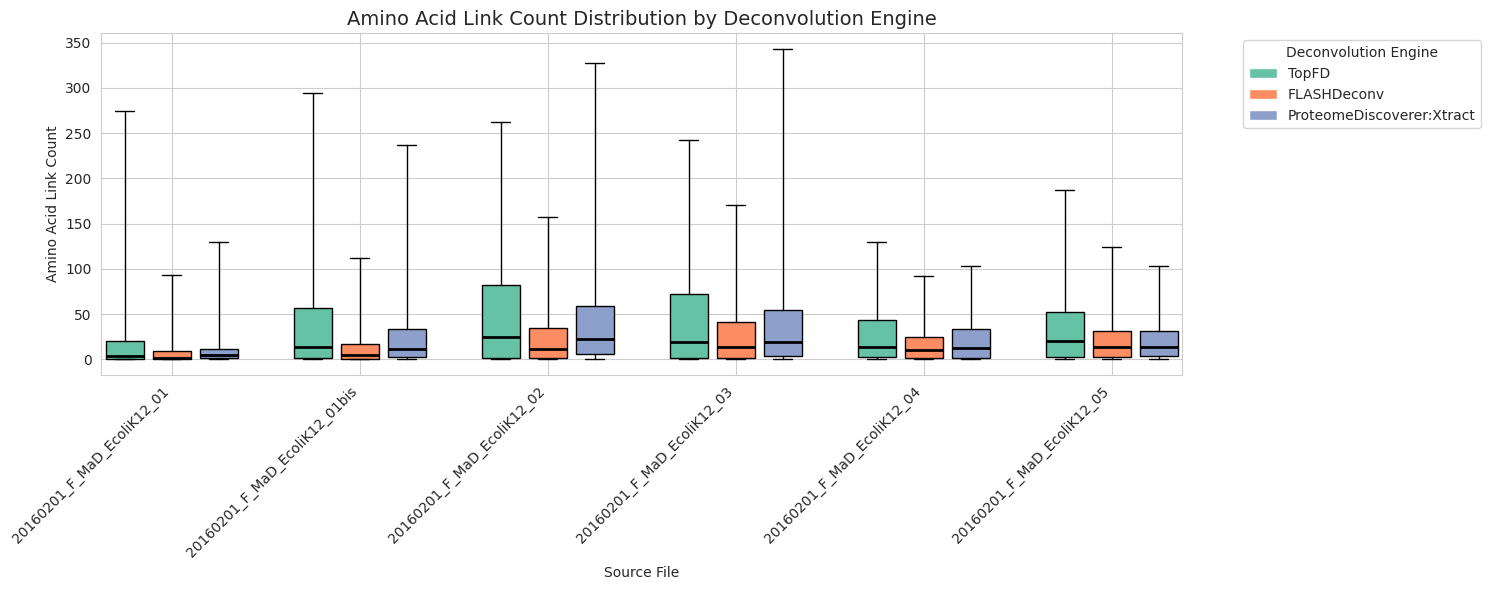

In [22]:
# Amino Acid Link Count Analysis (All engines)
aalink_cols = ['AALinkCountMin', 'AALinkCountQ1', 'AALinkCountQ2', 'AALinkCountQ3', 'AALinkCountMax']
create_boxplot(
    data=df,
    quartile_cols=aalink_cols,
    title='Amino Acid Link Count Distribution by Deconvolution Engine',
    ylabel='Amino Acid Link Count',
    grouped=True,
    figsize=(15, 6)
)


As expected, **TopFD** shows the largest number of amino acid links. *Why?*  

This metric reflects how often a given number of links is observed per spectrum. To get a better overview how many spectra contain amino acid links, we can examine how many spectra contain more than two amino acid links. For this, we will look at **AALinkCountAbove2**, which represents the number of spectra with two or more amino acid links.


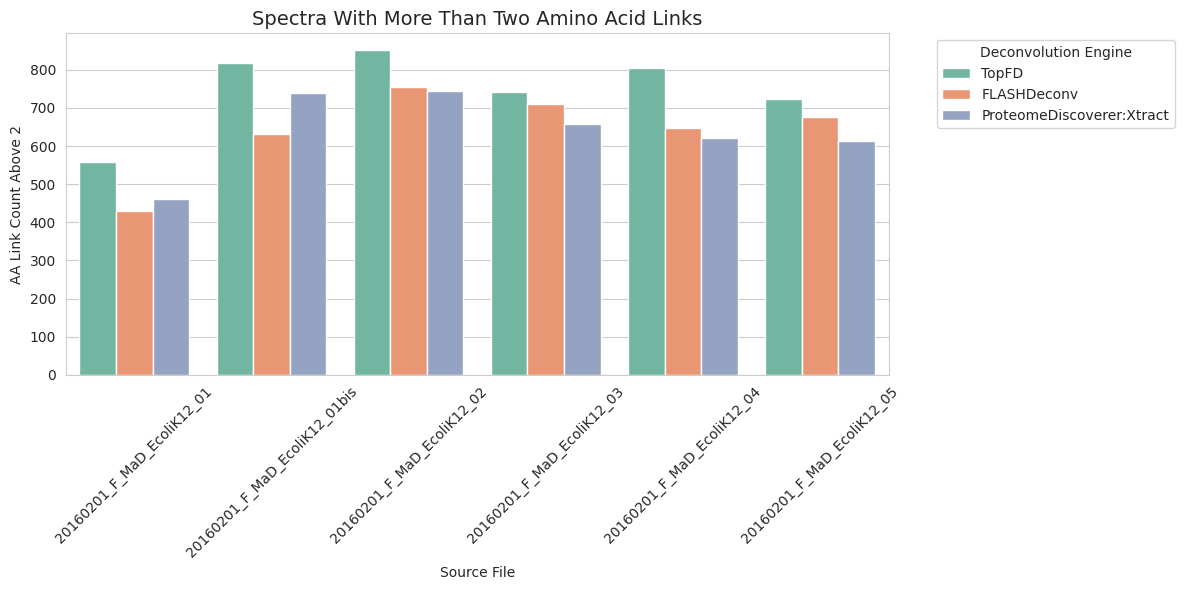

In [28]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df,
    x='SourceFile',
    y='AALinkCountAbove2',
    hue='DeconvolutionEngine',
    palette='Set2'
)

ax.set_title('Spectra With More Than Two Amino Acid Links', fontsize=14)
ax.set_xlabel('Source File')
ax.set_ylabel('AA Link Count Above 2')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Deconvolution Engine', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Using this setup, we can clearly see that although **FLASHDeconv** and **Xtract** report comparatively fewer masses and deconvolved spectra,  
the amount of spectra with **amino acid links** they produce is similar to that of **TopFD**.  

This suggests that, even with differences in how the tools handle and report spectra, they still capture a comparable amount of meaningful sequence information.  

### Evaluating the Number of Sequence Tags  

As a next step, we evaluate the **number of sequence tags** identified in the data. To qualify as a sequence tag, the mass difference between linked fragment ions must correspond to the mass of a real amino acid (within a defined tolerance).  

The **TagLength** columns summarize how many tags of different lengths were detected from the deconvolved spectra.  

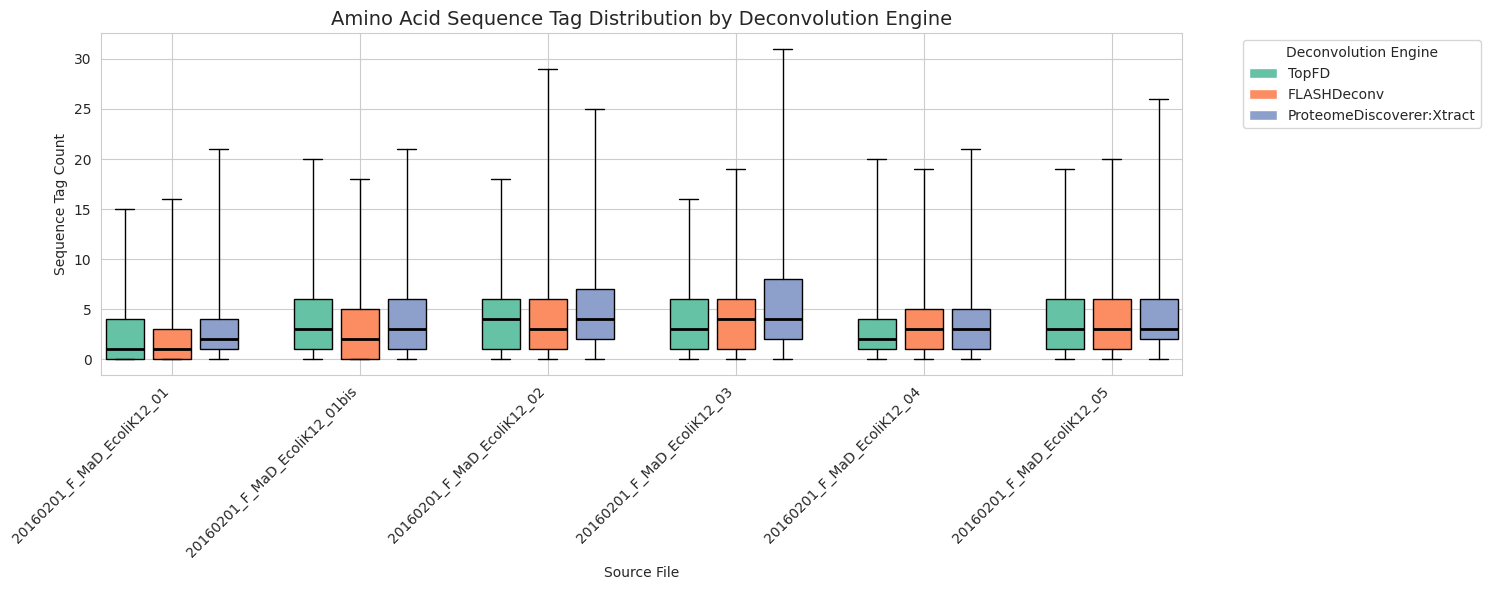

In [27]:
# Amino Acid Sequence Tag Count Analysis (All engines)
aalink_cols = ['TagLengthMin', 'TagLengthQ1', 'TagLengthQ2', 'TagLengthQ3', 'TagLengthMax']
create_boxplot(
    data=df,
    quartile_cols=aalink_cols,
    title='Amino Acid Sequence Tag Distribution by Deconvolution Engine',
    ylabel='Sequence Tag Count',
    grouped=True,
    figsize=(15, 6)
)

It is clear that while the number of **amino acid links per spectrum** differs quite a bit between the deconvolution engines, the total number of **sequence tags** they produce is actually quite similar.  

As a next step, we examine the **number of spectra that contain at least two sequence tags**. This gives us an idea of how often spectra provide more than one stretch of sequence evidence. For this analysis, we can use the **TagLengthAbove2** column:

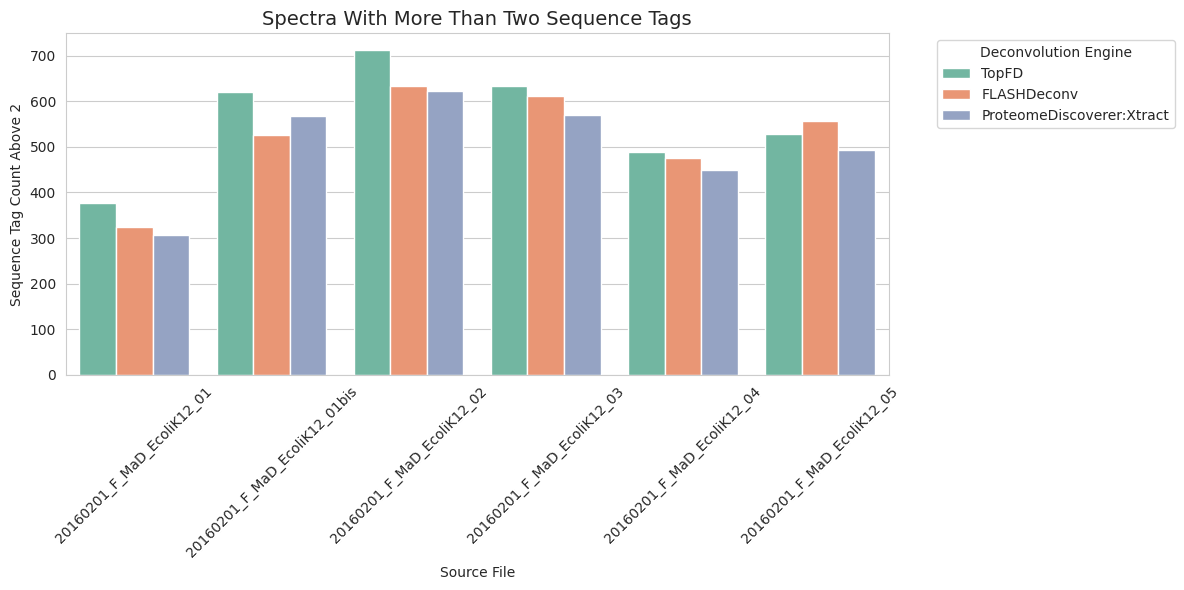

In [29]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    data=df,
    x='SourceFile',
    y='TagLengthAbove2',
    hue='DeconvolutionEngine',
    palette='Set2'
)

ax.set_title('Spectra With More Than Two Sequence Tags', fontsize=14)
ax.set_xlabel('Source File')
ax.set_ylabel('Sequence Tag Count Above 2')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Deconvolution Engine', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Again, the number of spectra containing **more than two sequence tags** is quite comparable across the different deconvolution engines,  
even though they report different numbers of masses.  

This raises an important question: *is reporting more masses necessarily beneficial for identification?*

This comparison is about as close as we can get to assessing the **quality of MSn spectra** without actually performing identifications. In the next part of the workshop, we will take a closer look at the **identifications** obtained from these datasets.  